In [27]:
import pandas as pd

In [28]:
teams = pd.read_csv('teams.csv')

In [29]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [30]:
import seaborn as sb

/Users/williamsiong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


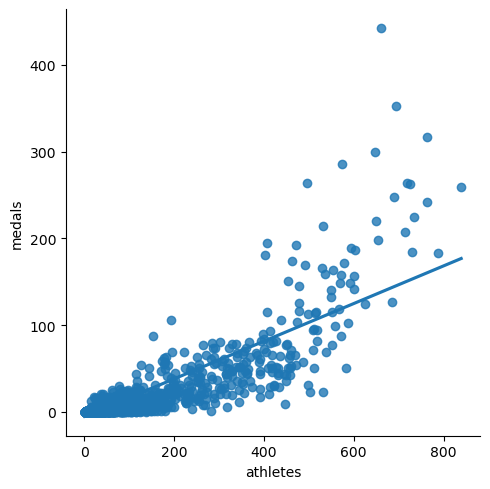

In [31]:
sb.lmplot(x = "athletes", y ="medals", data=teams, fit_reg=True, ci=None)

In [32]:
teams = teams.dropna()

In [33]:
teams[teams.isnull().any(axis=1)]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals


In [34]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [35]:
data_train = teams[teams["year"]<2012].copy()
data_test = teams[teams["year"]>=2012].copy()

In [36]:
data_train.shape

(1609, 11)

In [37]:
data_test.shape

(405, 11)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
reg = LinearRegression()

In [52]:
predictors = ["athletes", "prev_medals", "age"]

In [53]:
target = "medals"

In [54]:
reg.fit(data_train[predictors], data_train["medals"])

LinearRegression()

In [55]:
predictions = reg.predict(data_test[predictors])

In [56]:
predictions

array([-9.63231334e-01, -1.17052512e+00, -1.49653250e+00, -1.62964525e+00,
        2.15227876e+00,  3.97081475e+00, -2.26672496e+00, -1.94949838e+00,
        2.41149947e-01, -4.88190647e-01, -1.71922860e+00, -1.29954092e+00,
        4.65547305e+01,  2.85391220e+01,  4.57473592e+00,  2.56786949e+00,
       -1.78063388e+00, -1.58101575e+00, -1.64247201e+00, -1.88809310e+00,
        1.46448360e+02,  1.20432343e+02,  6.29663313e+00,  3.74721748e+00,
        7.30893662e+00,  1.02473373e+01,  5.09783687e+00,  3.52090934e+00,
       -1.32771900e+00, -1.53496179e+00, -1.47098097e+00, -1.24318476e+00,
       -1.48380773e+00, -1.40442459e+00,  1.15628409e+01,  9.95873841e+00,
       -1.89319321e+00, -1.84456371e+00, -1.80103431e+00, -1.59379151e+00,
       -2.20794623e+00, -2.01605475e+00, -2.13108765e+00, -1.39417339e+00,
       -2.12093843e+00, -2.12093843e+00,  3.27257829e+01,  2.51087745e+01,
       -1.70897739e+00, -1.34554388e+00, -1.75760690e+00, -1.67385359e-01,
        7.81800040e+01,  

In [57]:
data_test["predictions"] = predictions

In [58]:
data_test

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0,0.3,-0.963231
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0,0.7,-1.170525
24,ALB,Albania,2012,9,10,25.7,176.8,80.2,0,0.0,0.0,-1.496533
25,ALB,Albania,2016,6,6,23.7,176.2,67.2,0,0.0,0.0,-1.629645
37,ALG,Algeria,2012,29,39,24.8,174.3,66.9,1,2.0,2.3,2.152279
...,...,...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,19.3,169.7,65.7,0,0.0,0.0,-1.506886
2131,ZAM,Zambia,2012,7,7,22.6,176.2,74.2,0,0.0,0.0,-1.473557
2132,ZAM,Zambia,2016,7,7,24.1,175.2,67.5,0,0.0,0.0,-1.588691
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,1.312385


In [59]:
data_test.loc[data_test["predictions"]<0, "predictions"] = 0

In [60]:
data_test["predictions"] = data_test["predictions"].round()

In [61]:
data_test

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0,0.3,0.0
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0,0.7,0.0
24,ALB,Albania,2012,9,10,25.7,176.8,80.2,0,0.0,0.0,0.0
25,ALB,Albania,2016,6,6,23.7,176.2,67.2,0,0.0,0.0,0.0
37,ALG,Algeria,2012,29,39,24.8,174.3,66.9,1,2.0,2.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,19.3,169.7,65.7,0,0.0,0.0,0.0
2131,ZAM,Zambia,2012,7,7,22.6,176.2,74.2,0,0.0,0.0,0.0
2132,ZAM,Zambia,2016,7,7,24.1,175.2,67.5,0,0.0,0.0,0.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,1.0


In [62]:
data_test[data_test["team"] == "USA"]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
2053,USA,United States,2012,245,689,26.7,178.3,74.7,248,317.0,274.0,285.0
2054,USA,United States,2016,245,719,26.4,178.0,73.8,264,248.0,276.0,235.0


In [63]:
errors = (data_test["medals"] - predictions).abs()

In [71]:
team_error = errors.groupby(data_test["team"]).mean()

In [72]:
team_error

team
AFG    1.566878
ALB    1.563089
ALG    1.561547
AND    2.108112
ANG    0.364670
         ...   
VIE    1.354921
VIN    1.632246
YEM    1.497922
ZAM    1.531124
ZIM    0.721147
Name: medals, Length: 204, dtype: float64

<Axes: ylabel='Frequency'>

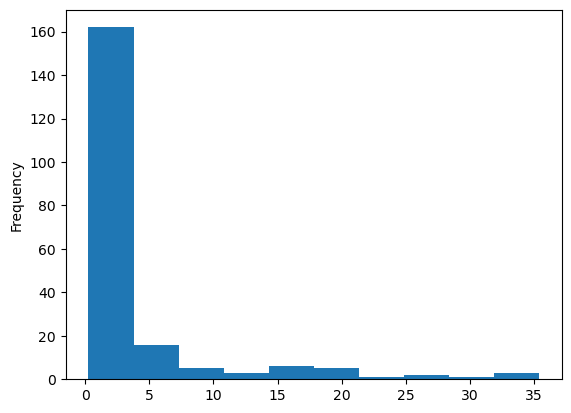

In [73]:
team_error.plot.hist()